In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns


In [95]:
df = pd.read_csv("/Users/atharvakhodke/Documents/PICT/PICT BE sem 7/lab submitions/practice/LP3/sales_data_sample.csv", encoding='unicode_escape')


In [96]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [97]:
df = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']]


In [98]:
# remove outliers using inter quantile range method
df = df.dropna()
for column in df:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    min_range = Q1-1.5*IQR
    max_range = Q3+1.5*IQR
    df.drop(df[df[column] < min_range].index, inplace=True)
    df.drop(df[df[column] > max_range].index, inplace=True)

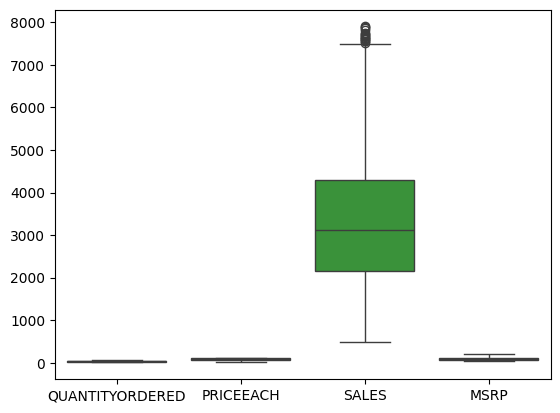

In [99]:
sns.boxplot(df)
plt.show()

In [100]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [101]:
# Step 4: Determine optimal number of clusters using the Elbow method
sse = []  # Sum of squared errors for each k
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)



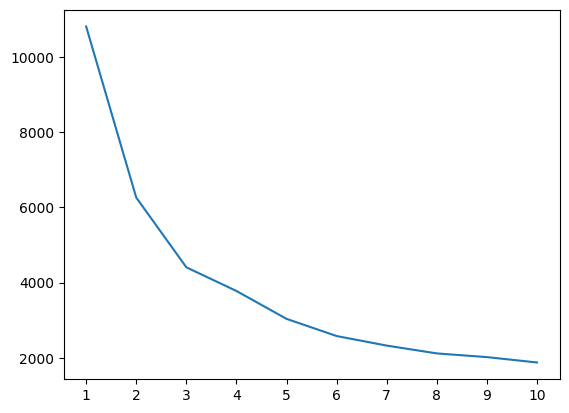

In [102]:
# Plot the Elbow method graph
sns.lineplot(x=k_range, y=sse)
plt.xticks(k_range)
plt.show()

In [103]:
# Step 5: Apply K-Means with the chosen number of clusters (e.g., 3)
optimal_k = 4 # Based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

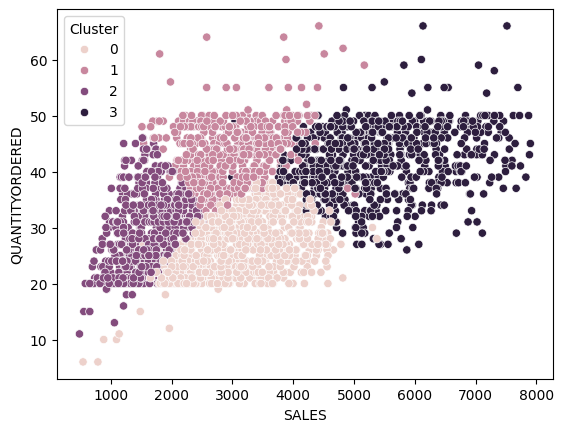

In [104]:
# plot clusters 
sns.scatterplot(data=df, x="SALES", y="QUANTITYORDERED", hue="Cluster")
plt.show()


In [105]:

# Optionally, print out cluster centers and evaluation scores
print("Cluster Centers:", kmeans.cluster_centers_)
print("Silhouette Score:", silhouette_score(scaled_features, df['Cluster']))

Cluster Centers: [[-0.81865884  0.65076826 -0.182663    0.42344911]
 [ 0.9515036  -0.64449425 -0.21095056 -0.6703234 ]
 [-0.60546188 -1.30280572 -1.12841096 -0.96744893]
 [ 0.79891704  0.79166877  1.34334118  0.80822169]]
Silhouette Score: 0.34824897319666687


K-Means Clustering:
K-Means is a popular unsupervised machine learning algorithm used to partition data into k clusters based on similarity. It assigns each data point to one of the k clusters such that the within-cluster variance (or "sum of squared errors") is minimized.

Steps of the K-Means Algorithm:

Initialization: Choose k random points as the initial cluster centroids (often selected randomly from the dataset).
Assignment Step: Assign each data point to the nearest centroid (based on a distance metric, typically Euclidean distance).
Update Step: Calculate new centroids by averaging the data points in each cluster.
Repeat: Repeat steps 2 and 3 until the centroids do not change significantly (i.e., convergence is reached).
Elbow Method for Determining the Optimal Number of Clusters:
The Elbow Method is a heuristic used to determine the best number of clusters k in K-Means. It involves running the K-Means algorithm for different values of k and plotting the Sum of Squared Errors (SSE) or Inertia against k.

SSE (Inertia) measures the compactness of the clusters:

A lower SSE means that the clusters are tight and well-separated.
A higher SSE means that the clusters are more dispersed.
How to Use the Elbow Method:

Run K-Means for various values of k (e.g., 1 to 10).
Plot the SSE (inertia) for each value of k.
Look for the "elbow" point in the plot: The point where the rate of decrease in SSE slows down significantly. The value of k at this point is considered the optimal number of clusters.
Why Elbow Method Works:
When k is small, the clusters are fewer, and the algorithm can't capture the full structure of the data, resulting in a high SSE.
As k increases, the SSE decreases because the model can form more clusters, but after a certain point, adding more clusters doesn’t significantly improve the clustering, and the decrease in SSE becomes less dramatic.
The "elbow" represents a balance between minimizing SSE and avoiding overfitting by choosing too many clusters.

Differences Between K-Means and Hierarchical Clustering:
K-Means requires the number of clusters to be predefined, while Hierarchical Clustering does not.
K-Means is generally faster for large datasets compared to hierarchical clustering.
Hierarchical clustering produces a dendrogram and gives more flexibility in choosing the number of clusters at any point, while K-Means directly outputs the clusters.


The Elbow Method is a technique used to determine the optimal number of clusters k for K-Means clustering. The method helps to find a balance between a good fit (minimizing the sum of squared errors) and avoiding overfitting by selecting too many clusters.

Key Concept:
The Elbow Method involves running K-Means clustering for different values of k and plotting the Sum of Squared Errors (SSE) or Inertia for each value of k. The optimal number of clusters is typically chosen at the point where the SSE curve starts to flatten, resembling an "elbow."

Steps to Apply the Elbow Method:
Run K-Means for Different Values of k:

Choose a range of values for k (e.g., from 1 to 10 or 1 to 20, depending on the dataset size).
For each value of k, run K-Means clustering and calculate the SSE (also known as inertia).
Plot the SSE (Inertia) vs. k:

On the x-axis, plot the number of clusters (k).
On the y-axis, plot the corresponding SSE for each k.
Look for the "Elbow":

The Elbow is the point on the plot where the SSE begins to decrease at a slower rate. Before this point, adding more clusters results in a significant decrease in SSE. After the elbow, the improvement in SSE becomes marginal.
The optimal value of k is the one at the elbow point, as it balances the goodness of fit and the complexity of the model.
